<a href="https://colab.research.google.com/github/Mukul1Panwar/Deep-Learning/blob/main/movie_review(lstm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/imdb-dataset-of-50k-movie-reviews.zip")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.models import Sequential

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
df.isna().sum()

,0
review,0
sentiment,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['sentiment']=le.fit_transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data,test_data = train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
print("train_data shape : ",train_data.shape)
print("test_data shape : ",test_data.shape)

train_data shape :  (40000, 2)
test_data shape :  (10000, 2)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000)

In [ ]:
tokenizer.fit_on_texts(train_data['review'])

In [ ]:
tokenizer.num_words

5000

In [ ]:
Xtrain = tokenizer.texts_to_sequences(train_data['review'])

In [ ]:
Xtest = tokenizer.texts_to_sequences(test_data['review'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
Xtrain = pad_sequences(Xtrain,maxlen=200)
Xtest = pad_sequences(Xtest,maxlen=200)

In [ ]:
Xtrain.shape

(40000, 200)

In [ ]:
max(len(x) for x in Xtrain)

200

In [ ]:
Ytrain = train_data['sentiment']
Ytest = test_data['sentiment']

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=50000,output_dim=100,input_length=200)) #Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length)
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(Xtrain,Ytrain,epochs=4,batch_size=64,validation_split=0.2)

Epoch 1/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8422 - loss: 0.3732 - val_accuracy: 0.8702 - val_loss: 0.3227
Epoch 2/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8984 - loss: 0.2602 - val_accuracy: 0.8790 - val_loss: 0.2912
Epoch 3/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9110 - loss: 0.2270 - val_accuracy: 0.8781 - val_loss: 0.3095
Epoch 4/4
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9240 - loss: 0.1976 - val_accuracy: 0.8770 - val_loss: 0.3173


In [ ]:
from matplotlib import pyplot as plt

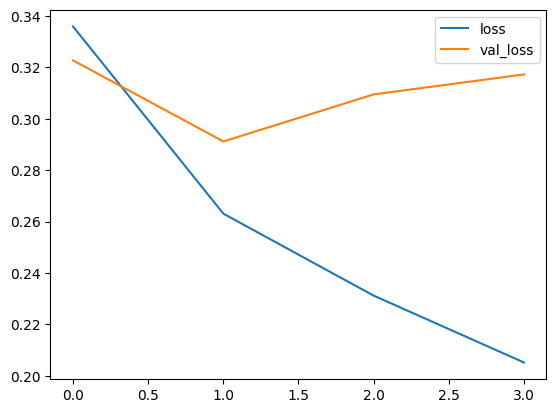

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

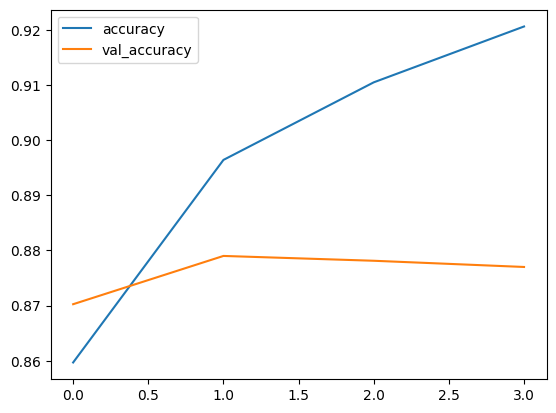

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
sentence = input("enter the review : ")
sentence1 = tokenizer.texts_to_sequences([sentence])
sen_pad = pad_sequences(sentence1,maxlen=200)
prediction = model.predict(sen_pad)[0][0]

print(prediction)

if prediction >=0.5 :
  print("Positive")
else:
  print("Negative")